In [1]:
import tensorflow as tf
import mlflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.executable

'c:\\Users\\fauzan\\anaconda3\\envs\\mlflow_mnist\\python.exe'

In [3]:
!python --version

Python 3.10.14


In [4]:
print(tf.__version__)

2.16.1


In [5]:
print(mlflow.__version__)

2.13.0


In [6]:
def load_data():
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    return train_images, train_labels, test_images, test_labels, class_names

In [7]:
train_images, train_labels, test_images, test_labels, class_names= load_data()

In [8]:
print(train_images.shape)
#Each Label is between 0-9train_labels
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
def get_val_data(test_images, test_labels):
    test_images_sub_arr = np.array_split(test_images, 2)
    val_images = test_images_sub_arr[0]
    test_images = test_images_sub_arr[1]
    

    test_labels_sub_arr = np.array_split(test_labels, 2)
    val_labels = test_labels_sub_arr[0]
    test_labels = test_labels_sub_arr[1]
    
    return val_images, val_labels, test_images, test_labels

In [10]:
val_images, val_labels, test_images, test_labels = get_val_data(test_images, test_labels)

In [11]:
print(val_images.shape)
print(test_images.shape)

print(val_labels.shape)
print(test_labels.shape)

(5000, 28, 28)
(5000, 28, 28)
(5000,)
(5000,)


### Preprocess the data

The data must be preprocessed before training the network.

**If you inspect the images in the training set, you will see that the pixel values fall in the range of 0 to 255.**

In [12]:
def check_image_pixel_values(single_image):
    plt.figure()
    plt.imshow(single_image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

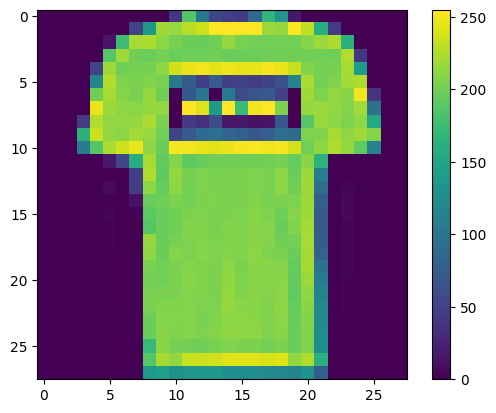

In [13]:
check_image_pixel_values(train_images[1])

### Image Scaling

Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

To do so, divide the values by 255. It's important that the training set, validation set and testing set be preprocessed in the same way:

In [14]:
def image_scaling(img_arr):
    scaled_img = img_arr / 255.0
    return scaled_img

In [15]:
scaled_train_images = image_scaling(train_images)
scaled_val_images = image_scaling(val_images)
scaled_test_images = image_scaling(test_images)

In [16]:
def verify_data_format(img_arr, img_labels,class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_arr[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[img_labels[i]])
    plt.show()

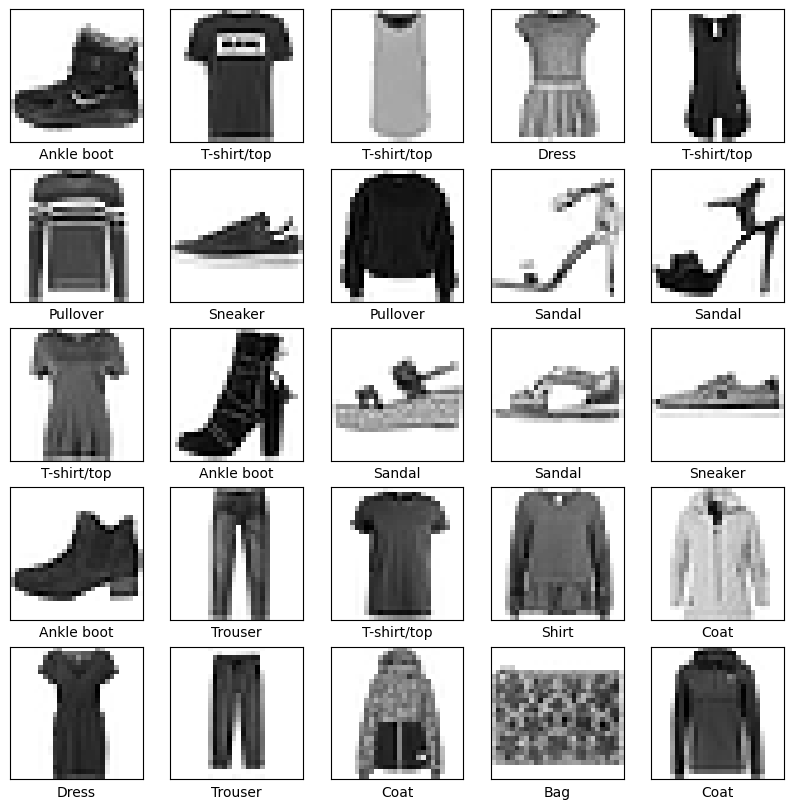

In [17]:
verify_data_format(scaled_train_images, train_labels,class_names)

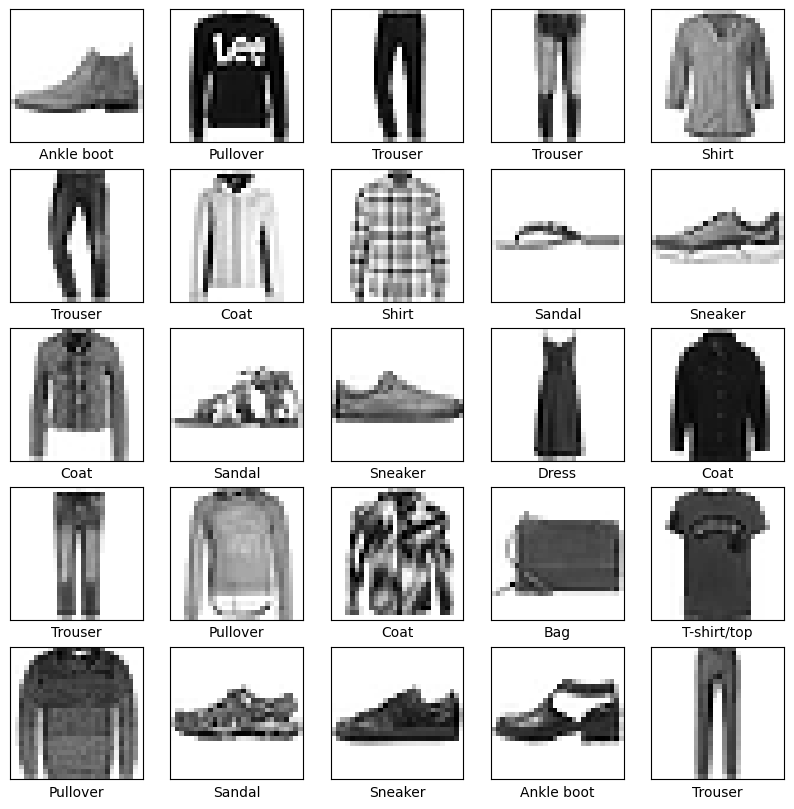

In [18]:
verify_data_format(scaled_val_images, val_labels,class_names)

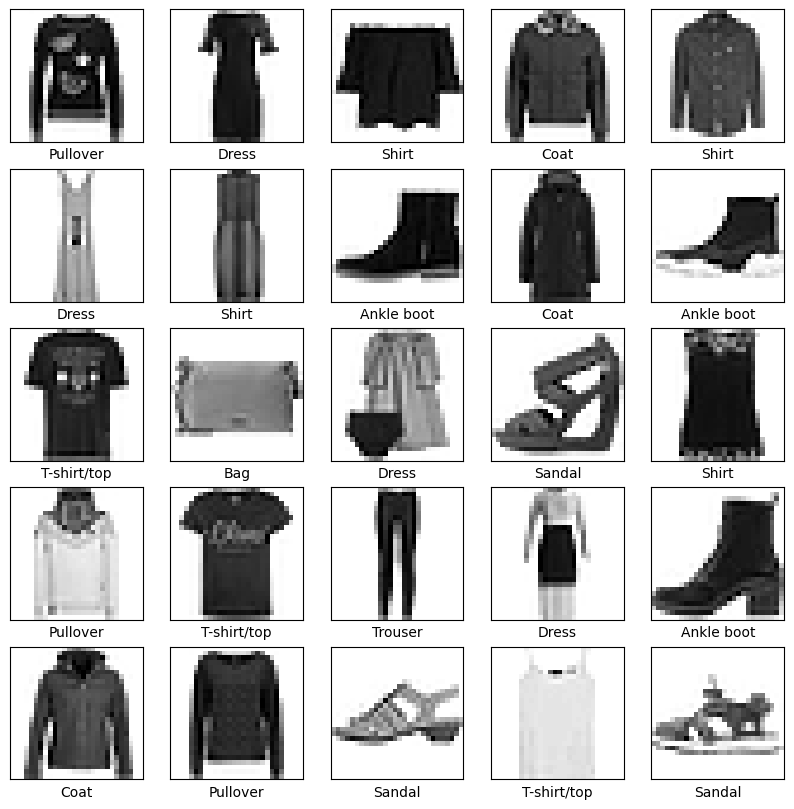

In [19]:
verify_data_format(scaled_test_images, test_labels,class_names)

### Build the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def tf_model_build():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


### Compile the model

In [21]:
def tf_compile_model(model):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

### Training the model

.. Note:: Autologging is known to be compatible with the following package versions: ``2.3.0`` <= ``tensorflow`` <= ``2.12.0``. Autologging may not succeed when used with package versions outside of this range.

In [ ]:
# import mlflow
# mlflow.tensorflow.autolog(every_n_iter=2)

In [22]:
scaled_val_images.shape

(5000, 28, 28)

In [23]:
def tf_train_model(model,scaled_train_images, train_labels, epochs, batch_size, scaled_val_images, val_labels):
    history = model.fit(scaled_train_images, 
              train_labels, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_data=(scaled_val_images, val_labels)
             )
    return history, model

In [26]:
model = tf_model_build()
model = tf_compile_model(model)

epochs = 10
batch_size = 32
history, model = tf_train_model(model,scaled_train_images, train_labels, epochs, batch_size, scaled_val_images, val_labels)


c:\Users\fauzan\anaconda3\envs\mlflow_mnist\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\fauzan\anaconda3\envs\mlflow_mnist\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7494 - loss: 0.6826 - val_accuracy: 0.8696 - val_loss: 0.3650
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8774 - loss: 0.3328 - val_accuracy: 0.8928 - val_loss: 0.3077
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8953 - loss: 0.2820 - val_accuracy: 0.8910 - val_loss: 0.2992
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9089 - loss: 0.2473 - val_accuracy: 0.8990 - val_loss: 0.2806
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9190 - loss: 0.2169 - val_accuracy: 0.8994 - val_loss: 0.2866
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9266 - loss: 0.1991 - val_accuracy: 0.8964 - val_loss: 0.2887
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9317 - loss: 0.1818 - val_accuracy: 0.9048 - val_loss: 0.2744
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9401 - loss: 0.1604 

### Evaluate Model in test Images

In [27]:
train_loss, train_acc = model.evaluate(scaled_train_images,  train_labels, verbose=2)
val_loss, val_acc = model.evaluate(scaled_val_images,  val_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

1875/1875 - 6s - 3ms/step - accuracy: 0.9553 - loss: 0.1210
157/157 - 1s - 3ms/step - accuracy: 0.9048 - loss: 0.2911
157/157 - 1s - 4ms/step - accuracy: 0.7808 - loss: 87.9529


## Experiment Tracking for Tensorflow based Models

In [30]:
def tf_experiment_tracking(exp_name, run_name, batch_size, epochs, train_loss, train_acc, 
                           val_loss, val_acc, test_loss, test_acc, model_signature):
    mlflow.set_tracking_uri('http://localhost:5000')
    mlflow.set_experiment(exp_name)
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param("batch_size", batch_size)
        # mlflow.log_artifact(scaled_train_images,artifact_path='datasets')
        #mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("epochs", epochs)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("val_loss", val_loss)
        mlflow.log_metric("val_accuracy", val_acc)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.tensorflow.log_model(model, "mnist", signature=model_signature)
    mlflow.end_run()

from mlflow.models.signature import infer_signature
from datetime import datetime
model_signature = infer_signature(scaled_test_images, model.predict(scaled_test_images))
exp_name = 'testing'
run_timestamp = datetime.now().strftime("%Y%m%d--%H%M%S")
run_name = "live_mnist_exp_run_"+ run_timestamp
mlflow.set_experiment(exp_name)
tf_experiment_tracking(exp_name, run_name, batch_size, epochs, train_loss, train_acc, 
                           val_loss, val_acc, test_loss, test_acc, model_signature)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\fauzan\anaconda3\envs\mlflow_mnist\lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [32]:
import mlflow
logged_model = 'runs:/d2e8858cbf094ae8a63545546a266aa4/mnist'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

#test_images1 = scaled_test_images.astype('float64')
predictions = loaded_model.predict(scaled_test_images)
np.argmax(predictions[0])

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


2

In [34]:
test_labels[0]

2

In [35]:
print(np.argmax(predictions[1]), test_labels[1])

3 3


https://www.tensorflow.org/tutorials/keras/classification

## Thank You